In [8]:
from pandas import read_csv
import re
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
games_data = pd.read_csv('steam_games.csv')
games_data

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7,

In [5]:
#Adding new columns for game dataset analysis purpose
games_data['positive_review_percent'] = -1
games_data['review_qualification'] = ""
for i, row in games_data.iterrows():
    if type(row["all_reviews"]) == str:
        x = re.findall(r'- [0,1,2,3,4,5,6,7,8,9]*%', row["all_reviews"])
        if len(x) != 0:
            games_data.at[i, 'positive_review_percent'] = x[0].translate({ord(i): None for i in '- %'})
        reviews = row['all_reviews'].split(",")
        if 'user reviews' in reviews:
            games_data.at[i, 'review_qualification'] = ""
        else:
            games_data.at[i, 'review_qualification'] = reviews[0]
#List of possible reviews obtained
all_list_review = games_data["review_qualification"].unique()
all_list_review

array(['Very Positive', 'Mixed', 'Mostly Positive', '',
       'Overwhelmingly Positive', '7 user reviews', 'Positive',
       '1 user reviews', 'Mostly Negative', '5 user reviews',
       '3 user reviews', '2 user reviews', '4 user reviews',
       '9 user reviews', '6 user reviews', '8 user reviews', 'Negative',
       'Very Negative', 'Overwhelmingly Negative'], dtype=object)

In [7]:
#Outputting the new dataset containing reviews qualifications and percent to new csv file
games_data.to_csv('steam_games_review.csv', columns=["name", "positive_review_percent", "review_qualification", "all_reviews"], index=False)
review_gamesdata = pd.read_csv('steam_games_review.csv')
review_gamesdata

,name,positive_review_percent,review_qualification,all_reviews
0,DOOM,92,Very Positive,"Very Positive,(42,550),- 92% of the 42,550 use..."
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,Mixed,"Mixed,(836,608),- 49% of the 836,608 user revi..."
2,BATTLETECH,71,Mostly Positive,"Mostly Positive,(7,030),- 71% of the 7,030 use..."
3,DayZ,61,Mixed,"Mixed,(167,115),- 61% of the 167,115 user revi..."
4,EVE Online,74,Mostly Positive,"Mostly Positive,(11,481),- 74% of the 11,481 u..."
...,...,...,...,...
40828,Rocksmith® 2014 Edition – Remastered – Sabaton...,-1,NaN,NaN
40829,Rocksmith® 2014 Edition – Remastered – Stone T...,-1,NaN,NaN
40830,Fantasy Grounds - Quests of Doom 4: A Midnight...,-1,NaN,NaN
40831,Mega Man X5 Sound Collection,-1,NaN,NaN


Histogram review Plot for game review distribution

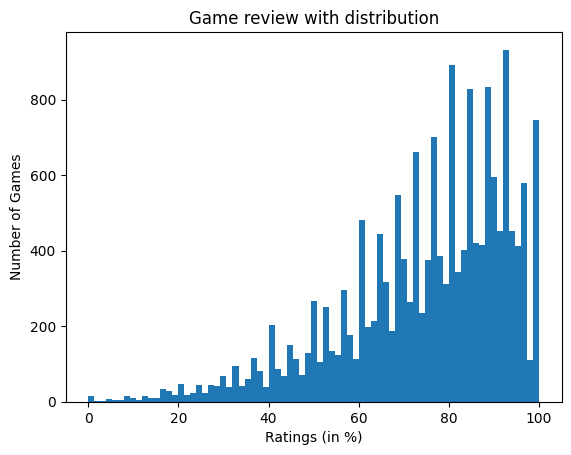

In [14]:
review_data = read_csv('steam_games_review.csv', usecols=["name", "positive_review_percent"])
plt.hist(x=review_data['positive_review_percent'], range=[0,100], bins=75)
plt.title("Game review with distribution")
plt.xlabel('Ratings (in %)')
plt.ylabel('Number of Games')
plt.show()


Barplot to give popularity (count) of a genre in respective no of games

<Figure size 1000x1000 with 0 Axes>

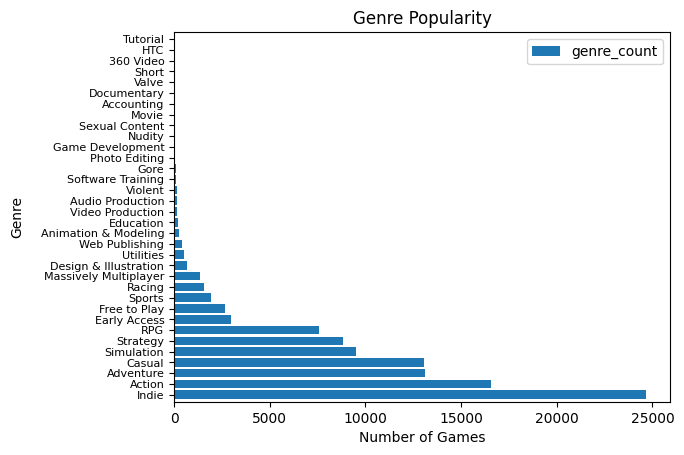

In [36]:
games_genre = read_csv('steam_games.csv', usecols=['genre'])
no = []
for i, row in games_genre.iterrows():
    if type(row["genre"]) is str:
        no = no + row["genre"].split(",")
unique_genre = list(set(no))
genre_data = pd.DataFrame(columns=["genre", "total_count"])
for genre in unique_genre:
    genre_data2 = pd.DataFrame(data=[[genre, no.count(genre)]], columns=["genre", "genre_count"])
    genre_data = pd.concat([genre_data, genre_data2], ignore_index=True)
genre_data = genre_data.sort_values(by="genre_count", ascending=False)
plt.figure(figsize=(10,10))
genre_data.plot.barh(x='genre', y='genre_count', width=0.8)
plt.title('Genre Popularity')
plt.xlabel('Number of Games')
plt.ylabel('Genre', labelpad=12)
plt.yticks(fontsize=8, fontweight='normal')
plt.show()

      popular_tags  count
375          Indie  23718
89          Action  16112
136      Adventure  13378
219         Casual  12969
93      Simulation   9273
..             ...    ...
135            BMX      3
133  Asymmetric VR      3
190   Snowboarding      3
49            Snow      3
204         Skiing      2

[376 rows x 2 columns]


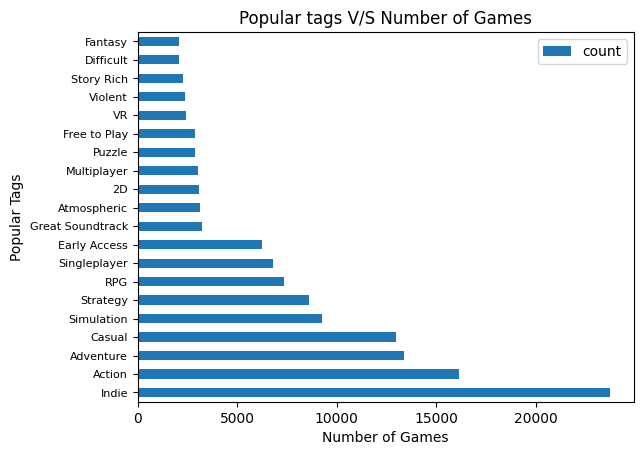

In [37]:
games_tags = pd.read_csv('steam_games.csv', usecols=['popular_tags'])
no = []
for i, row in games_tags.iterrows():
    if type(row["popular_tags"]) is str:
        no = no + row["popular_tags"].split(",")
unique_tags = list(set(no))
tags_data = pd.DataFrame(columns=["popular_tags", "count"])
for tags in unique_tags:
    tags_data2 = pd.DataFrame(data=[[tags, no.count(tags)]], columns=["popular_tags", "count"])
    tags_data = pd.concat([tags_data, tags_data2], ignore_index=True)
tags_data = tags_data.sort_values(by="count", ascending=False)
print(tags_data)
tags_data = tags_data.head(20)
tags_data.plot.barh(x='popular_tags', y='count')
plt.title('Popular tags V/S Number of Games')
plt.xlabel('Number of Games')
plt.ylabel('Popular Tags')
plt.yticks(fontsize=8)
plt.show()